* Вам предоставлен набор данных, первоначально полученный в Национальном институте диабета, болезней органов пищеварения и почек. 
Этот набор данных создан для того, чтобы на основе определённых диагностических измерений предсказать, есть ли у пациента диабет. 
На выбор этих экземпляров из более крупной базы данных было наложено несколько ограничений. В частности, все пациенты здесь — женщины не моложе 21 года индейского происхождения Пима.
Прочитаем наши данные и выведем первые пять строк таблицы:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
diabetes = pd.read_csv('diabetes_data.csv')
diabetes.shape[0]


778

* Pregnancies — количество беременностей.

* Glucose — концентрация глюкозы в плазме через два часа при пероральном тесте на толерантность к глюкозе.

* BloodPressure — диастолическое артериальное давление (мм рт. ст.).

* SkinThickness — толщина кожной складки трицепса (мм).

* Insulin — двухчасовой сывороточный инсулин (ме Ед/мл).

* BMI — индекс массы тела ().

* DiabetesPedigreeFunction — функция родословной диабета (чем она выше, тем выше шанс наследственной заболеваемости).

* Age — возраст.

* Outcome — наличие диабета (0 — нет, 1 — да).

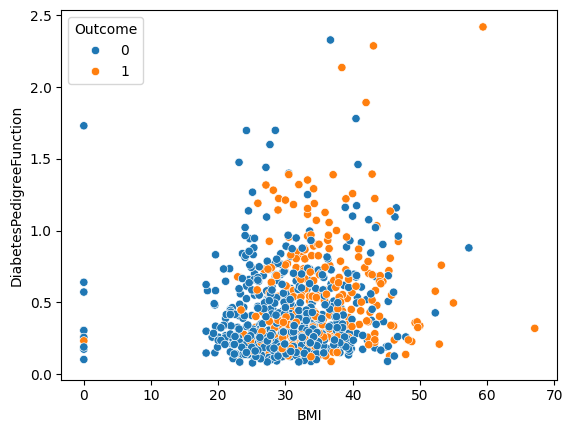

In [3]:

sns.scatterplot(
    data=diabetes, 
    x='BMI',
    y='DiabetesPedigreeFunction',
    hue='Outcome');

##### Задание 8.1
* Начнём с поиска дубликатов в данных. Найдите все повторяющиеся строки в данных и удалите их. Для поиска используйте все признаки в данных. Сколько записей осталось в данных?

In [4]:
display(diabetes.shape[0])
diabetes =diabetes.drop_duplicates()
diabetes.shape[0]


778

768

##### Задание 8.2
* Далее найдите все неинформативные признаки в данных и избавьтесь от них. В качестве порога информативности возьмите 0.95: удалите все признаки, для которых 95 % значений повторяются или 95 % записей уникальны. В ответ запишите имена признаков, которые вы нашли (без кавычек).

In [5]:
def low_information(data):
    low_information_cols = [] 
#цикл по всем столбцам
    for col in data.columns:
    #наибольшая относительная частота в признаке
        top_freq = data[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
        nunique_ratio = data[col].nunique() / data[col].count()
    # сравниваем наибольшую частоту с порогом
        if top_freq > 0.95:
            low_information_cols.append(col)
            print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
        if nunique_ratio > 0.95:
            low_information_cols.append(col)
            print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений') 
low_information(diabetes) 
diabetes=diabetes.drop('Gender',axis=1)  
diabetes         

Gender: 100.0% одинаковых значений


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98,58,33,190,34.0,0.430,43,0
1,2,112,75,32,0,35.7,0.148,21,0
2,2,108,64,0,0,30.8,0.158,21,0
3,8,107,80,0,0,24.6,0.856,34,0
4,7,136,90,0,0,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...,...
763,5,139,64,35,140,28.6,0.411,26,0
764,1,96,122,0,0,22.4,0.207,27,0
765,10,101,86,37,0,45.6,1.136,38,1
766,0,141,0,0,0,42.4,0.205,29,1


##### Задание 8.3
* Попробуйте найти пропуски в данных с помощью метода isnull().
Спойлер: ничего не найдёте. А они есть! Просто они скрыты от наших глаз. В таблице пропуски в столбцах Glucose, BloodPressure, SkinThickness, Insulin и BMI обозначены нулём, поэтому традиционные методы поиска пропусков ничего вам не покажут. Давайте это исправим!
Замените все записи, равные 0, в столбцах Glucose, BloodPressure, SkinThickness, Insulin и BMI на символ пропуска. Его вы можете взять из библиотеки numpy: np.nan.
Какая доля пропусков содержится в столбце Insulin? Ответ округлите до сотых.

In [6]:

diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
diabetes['Insulin']

0      190
1        0
2        0
3        0
4        0
      ... 
763    140
764      0
765      0
766      0
767      0
Name: Insulin, Length: 768, dtype: int64

In [8]:
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes[cols_to_replace] = diabetes[cols_to_replace].replace(0, np.nan)
diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

* Задание 8.4
Удалите из данных признаки, где число пропусков составляет более 30 %. Сколько признаков осталось в ваших данных (с учетом удаленных неинформативных признаков в задании 8.2)?

In [9]:
th=diabetes.shape[0]*0.7
diabetes1=diabetes
diabetes = diabetes.dropna(thresh=th,axis=1)
diabetes.shape[1]

8

* Задание 8.5

Удалите из данных только те строки, в которых содержится более двух пропусков одновременно. Чему равно результирующее число записей в таблице?

In [10]:
th = diabetes.shape[1]

diabetes = diabetes.dropna(thresh=th-2,axis=0)
diabetes.shape[0]

761

* Задание 8.6 В оставшихся записях замените пропуски на медиану. Чему равно среднее значение в столбце SkinThickness? Ответ округлите до десятых.

In [11]:
values = {'Glucose':diabetes['Glucose'].median(),
        'BloodPressure':diabetes['BloodPressure'].median(),
        'SkinThickness':diabetes['SkinThickness'].median(), 
        'BMI':diabetes['BMI'].median()
    
}
diabetes = diabetes.fillna(values)
round(diabetes['SkinThickness'].mean(),1)

29.1

* Задание 8.7 Сколько выбросов найдёт классический метод межквартильного размаха в признаке SkinThickness?

In [12]:
def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned
outliers, cleaned = outliers_iqr(diabetes, 'SkinThickness')
outliers.shape[0]

87

* Задание 8.8 Сколько выбросов найдёт классический метод z-отклонения в признаке SkinThickness?



In [13]:
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned
outliers, cleaned = outliers_z_score(diabetes, 'SkinThickness', log_scale=False)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')


Число выбросов по методу z-отклонения: 4
Результирующее число записей: 757


* Задание 8.9 На приведённой гистограмме показано распределение признака DiabetesPedigreeFunction. Такой вид распределения очень похож на логнормальный, и он заставляет задуматься о логарифмировании признака. Найдите сначала число выбросов в признаке DiabetesPedigreeFunction с помощью классического метода межквартильного размаха.

In [14]:
def outliers_iqr_mod(data, feature, left=3, right=3,log = True):
    if log:
        x = np.log(data[feature])
    else:    
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned
outliers_iqr_mod(diabetes, 'DiabetesPedigreeFunction', left=1.5, right=1.5,log = True)

(Empty DataFrame
 Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, BMI, DiabetesPedigreeFunction, Age, Outcome]
 Index: [],
      Pregnancies  Glucose  BloodPressure  SkinThickness   BMI  \
 0              6     98.0           58.0           33.0  34.0   
 1              2    112.0           75.0           32.0  35.7   
 2              2    108.0           64.0           29.0  30.8   
 3              8    107.0           80.0           29.0  24.6   
 4              7    136.0           90.0           29.0  29.9   
 ..           ...      ...            ...            ...   ...   
 763            5    139.0           64.0           35.0  28.6   
 764            1     96.0          122.0           29.0  22.4   
 765           10    101.0           86.0           37.0  45.6   
 766            0    141.0           72.0           29.0  42.4   
 767            0    125.0           96.0           29.0  22.5   
 
      DiabetesPedigreeFunction  Age  Outcome  
 0                    

Имеются две базы данных (два листа Excel-файла): база с ценами конкурентов (Data_Parsing) и внутренняя база компании (Data_Company).

В базе парсинга есть два id, однозначно определяющие товар: producer_id и producer_color.

В базе компании есть два аналогичных поля: item_id и color_id.

Нам известно, что коды в двух базах отличаются наличием набора служебных символов. В базе парсинга встречаются следующие символы: _, -, ~, \\, /.

Необходимо:

Считать данные из Excel в DataFrame (Data_Parsing) и (Data_Company).
Подтянуть к базе парсинга данные из базы компании (item_id, color_id, current_price) и сформировать столбец разницы цен в % (цена конкурента к нашей цене).
Определить сильные отклонения от среднего в разности цен в пределах бренда-категории (то есть убрать случайные выбросы, сильно искажающие сравнение). Критерий — по вкусу, написать комментарий в коде.
Записать новый файл Excel с базой парсинга, приклееными к ней столбцами из пункта 2 и с учётом пункта 3 (можно добавить столбец outlier и проставить Yes для выбросов).

* Считать данные из Excel в DataFrame (Data_Parsing) и (Data_Company).

* Подтянуть к базе парсинга данные из базы компании (item_id, color_id, current_price) и сформировать столбец разницы цен в % (цена конкурента к нашей цене).

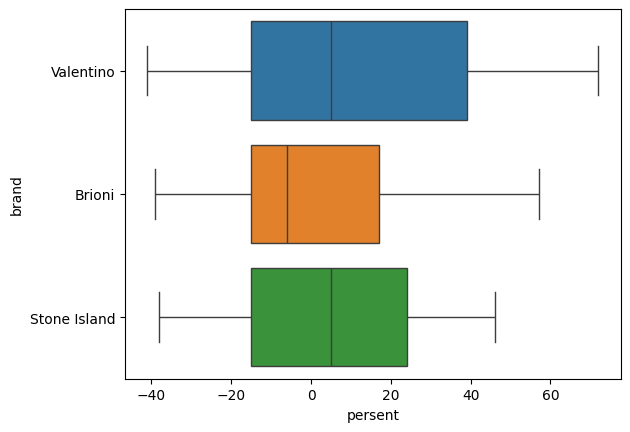

In [299]:

import openpyxl 
Data_Parsing = pd.read_excel('Data_TSUM.xlsx',sheet_name='Data_Parsing')
Data_Company = pd.read_excel('Data_TSUM.xlsx',sheet_name='Data_Company')
#print(Data_Parsing,Data_Company)
# убрать с color_id _, -, ~, \\, /.

#Data_Parsing['item_id'] = Data_Company['item_id']
#Data_Parsing['color_id'] = Data_Company['color_id']
#Data_Parsing['current price'] = Data_Company['current price']
#display(Data_Parsing)
#Data_Parsing['price difference'] =round(Data_Parsing['current price'] / Data_Parsing['price'] *100) 
#Data_Parsing['price difference'] =Data_Parsing['price difference'] - 100

Data_Parsing['producer_id'] = Data_Parsing['producer_id'].apply(lambda x: x.replace('_','') )

lst = ['_','-','~','\\','/']
Data_Parsing['producer_color'] 

def del_func(values):
    values = values.replace('_','')
    values = values.replace('-','')
    values = values.replace('~','')
    values = values.replace('\\','')
    values = values.replace('/','')
    return values
Data_Parsing['producer_color'] = Data_Parsing['producer_color'].apply(del_func)




Data_Parsing =Data_Parsing.merge(right=Data_Company,
                                 how='left', 
                                 #on ='item_id',
                                 left_on=['brand','Category','producer_id','producer_color'],  
                                 right_on=['brand','Category','item_id','color_id']
)




Data_Parsing['persent'] =round(Data_Parsing['current price'] / Data_Parsing['price']*100,0) 
Data_Parsing['persent'] = Data_Parsing['persent'] - 100
sns.boxplot(Data_Parsing,
            x = 'persent',
            y='brand',
            hue='brand'
    
)
 
#Data_Parsing = pd.to_excel('Data_TSUM1.xlsx',sheet_name='Data_Parsing')
#Data_Company = pd.to_excel('Data_TSUM1.xlsx',sheet_name='Data_Company')
Data_Parsing.to_excel('Data_TSUM1.xlsx',sheet_name='Data_Parsing')



    

        
      
    
  